# Variable Selection in Multiple Regression (다중선형회귀분석에서의 변수 선택법)

## Contents
1. 단계적 방법(stepwise selection) - step() 함수 이용
2. 최상부분집합선택법 - leaps 패키지 이용
3. 전진선택법으로 선택하기 - leaps 패키지 이용
4. 후진제거법으로 선택하기 - leaps 패키지 이용
---
## 1. 단계적 방법(stepwise selection) - step() 함수 이용
```step()``` 함수는 AIC를 기준으로 다중회귀모델의 변수를 판단해준다.

사용법: ```step(회귀모델, direction)``` 
direction은 "both", "forward", "backward" 중에서 선택할 수 있다.

In [1]:
# Step 1: mtcars 이용해 회귀모델을 구하기
DF <- mtcars
Lm <- lm(mpg ~ ., data=DF)
Lm


Call:
lm(formula = mpg ~ ., data = DF)

Coefficients:
(Intercept)          cyl         disp           hp         drat           wt  
   12.30337     -0.11144      0.01334     -0.02148      0.78711     -3.71530  
       qsec           vs           am         gear         carb  
    0.82104      0.31776      2.52023      0.65541     -0.19942  


In [2]:
# Step 2: step() 함수 사용하기
Slm <- step(Lm, direction="both")

Start:  AIC=70.9
mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- cyl   1    0.0799 147.57 68.915
- vs    1    0.1601 147.66 68.932
- carb  1    0.4067 147.90 68.986
- gear  1    1.3531 148.85 69.190
- drat  1    1.6270 149.12 69.249
- disp  1    3.9167 151.41 69.736
- hp    1    6.8399 154.33 70.348
- qsec  1    8.8641 156.36 70.765
<none>              147.49 70.898
- am    1   10.5467 158.04 71.108
- wt    1   27.0144 174.51 74.280

Step:  AIC=68.92
mpg ~ disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- vs    1    0.2685 147.84 66.973
- carb  1    0.5201 148.09 67.028
- gear  1    1.8211 149.40 67.308
- drat  1    1.9826 149.56 67.342
- disp  1    3.9009 151.47 67.750
- hp    1    7.3632 154.94 68.473
<none>              147.57 68.915
- qsec  1   10.0933 157.67 69.032
- am    1   11.8359 159.41 69.384
+ cyl   1    0.0799 147.49 70.898
- wt    1   27.0280 174.60 72.297

Step:  AIC=66.97
mpg ~

direction="both" 설정 시, 변수를 추가하거나 제거하면서 AIC 값이 작은 모델을 찾는다.
\+ 표시가 된 변수는 탈락한 변수들이다.

In [3]:
# Step 3: 최종 모델 확인하기
Slm


Call:
lm(formula = mpg ~ wt + qsec + am, data = DF)

Coefficients:
(Intercept)           wt         qsec           am  
      9.618       -3.917        1.226        2.936  


---
## 2. 최상부분집합선택법 - leaps 패키지 이용
leaps 패키지를 통해서 변수 개수가 동일한 부분집합들 가운데 가장 좋은 모델을 고를 수 있다. 

leaps 패키지의 ```regsubsets()``` 함수를 이용한다. ```regsubsets()```는 BIC값이 작은 모델을 찾는다.

이용법: ```regsubsets(종속변수 ~ 독립변수들, 데이터, 최대 독립변수 개수, 변수선택법)```

In [4]:
# Step 1: leaps 패키지 설치
#install.packages("leaps")
library("leaps")

Installing package into 'C:/Users/hyemin/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hyemin\AppData\Local\Temp\RtmpQ7lpY8\downloaded_packages


In [8]:
# Step 2: regsubsets() 함수를 이용해 변수선택하기
Slm <- regsubsets(mpg ~ ., data=DF, nvmax=10, method="exhaustive")

결과를 보기 위해서는 ```summary()``` 함수를 이용한다.

In [9]:
summary(Slm)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = DF, nvmax = 10, method = "exhaustive")
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 )  " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 )  " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 )  " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 )  " " "*"  "*

10개의 행 각각이 변수 개수가 1 ~ 10개일 때 BIC값이 가장 작은 변수의 조합을 나타낸다. 

따라서, 우리는 이들 중 통계량이 가장 작게 나온 것을 최종 선택하면 된다.

In [10]:
# Step 3: 선택된 모델들의 BIC 값 확인하기
BestBIC <- summary(Slm)$bic
BestBIC

[1] -37.79462 -46.34824 -46.77320 -45.09947 -42.98713 -40.22663 -37.09630
 [8] -33.77859 -30.37102 -26.92261

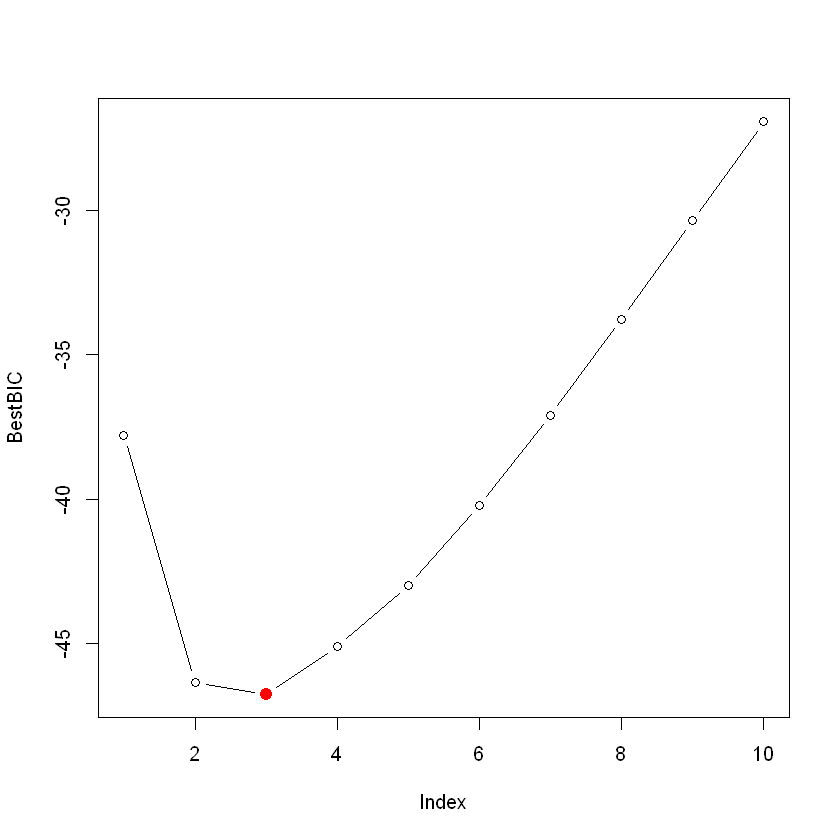

In [13]:
# Step 4: BIC값이 가장 작은 변수 찾기
MinVal <- which.min(BestBIC)
plot(BestBIC, type="b")
points(MinVal, BestBIC[MinVal], cex=2, col="red", pch=20)

wt, qsec, am을 변수로 갖는 변수 3개짜리 모델이 최적의 결과값을 주는 것을 확인했다. 이제 ```coef()```함수를 이용해 해당 모델의 회귀계수를 구해보자.

In [14]:
# Step 5: 최적의 모델에서의 회귀계수 구하기
coef(Slm, 3)

(Intercept)          wt        qsec          am 
   9.617781   -3.916504    1.225886    2.935837

---
## 3. 전진선택법으로 선택하기 - leaps 패키지 이용
leaps 패키지의 ```regsubsets()``` 함수를 이용하되, 옵션을 method =  "forward"로 준다.

In [16]:
# Step 1: regsubsets() 함수 이용하여 변수선택하기
library(leaps)

Slm <- regsubsets(mpg ~ ., data=DF, nvmax=10, method="forward")
summary(Slm)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = DF, nvmax = 10, method = "forward")
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 )  "*" " "  "*" " "  "*" " "  " " " " " "  " " 
4  ( 1 )  "*" " "  "*" " "  "*" " "  " " "*" " "  " " 
5  ( 1 )  "*" " "  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  "*" "*"  "*" " "  "*" "*"  " " "*" " "  " " 
7  ( 1 )  "*" "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
8  ( 1 )  "*" "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
9  ( 1 )  "*" "*"  "*" "*" 

전진선택법답게 다음 단계로 넘어갈 때 그전 단계에서 선택되었던 변수가 고정되어 하나씩 추가됨을 알 수 있다.

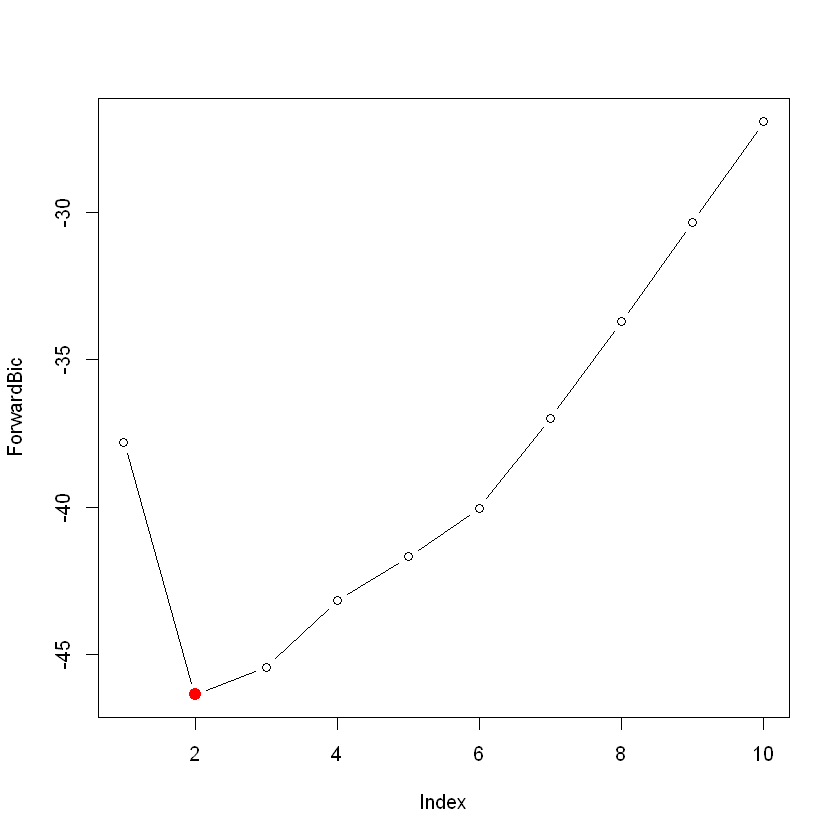

In [18]:
# Step 2: BIC값 확인하기
ForwardBic <- summary(Slm)$bic
MinVal <- which.min(ForwardBic)
plot(ForwardBic, type="b")
points(MinVal, ForwardBic[MinVal], cex=2, col="red", pch=20)

, qsec, am을 변수로 갖는 

In [19]:
# Step 3: 최적의 모델 구현하기
coef(Slm, 2)

(Intercept)         cyl          wt 
  39.686261   -1.507795   -3.190972

---
## 3. 전진선택법으로 선택하기 - leaps 패키지 이용
leaps 패키지의 ```regsubsets()``` 함수를 이용하되, 옵션을 method =  "backward"로 준다.

In [23]:
# Step 1: regsubsets() 함수 이용하여 변수선택하기
library(leaps)

Slm <- regsubsets(mpg ~ ., data=DF, nvmax=10, method="backward")
summary(Slm)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = DF, nvmax = 10, method = "backward")
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  " " " "  " " " "  "*" "*"  " " " " " "  " " 
3  ( 1 )  " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 )  " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 )  " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 )  " " "*"  "*" "*

후진선택법답게 다음 단계로 넘어갈 때 그전 단계에서 선택되었던 변수가 하나씩 제거됨을 알 수 있다.

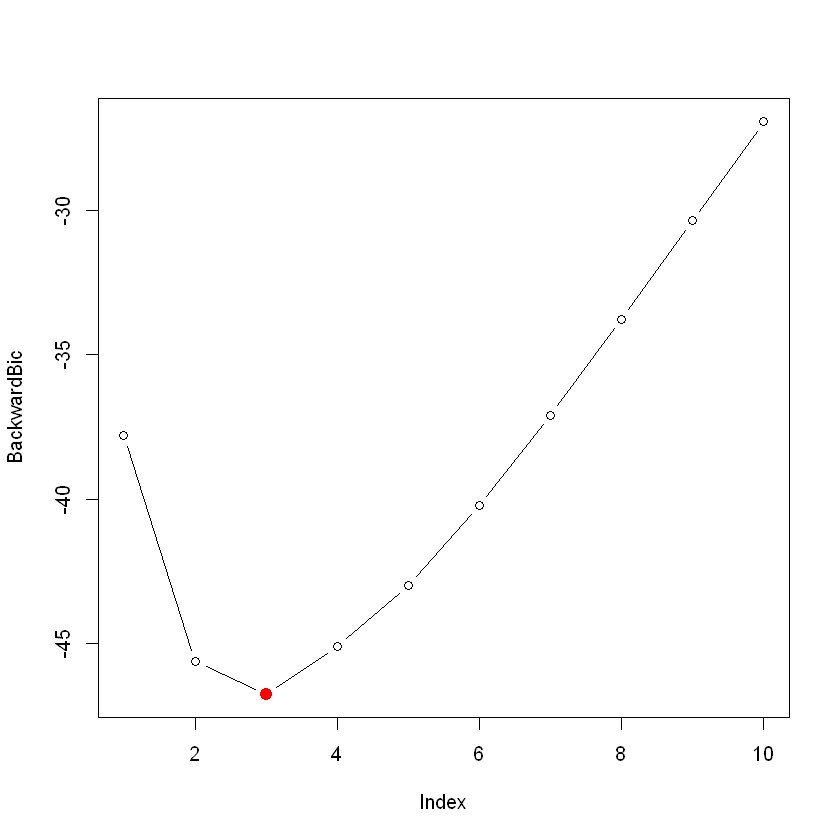

In [24]:
# Step 2: BIC값 확인하기
BackwardBic <- summary(Slm)$bic
MinVal <- which.min(BackwardBic)
plot(BackwardBic, type="b")
points(MinVal, BackwardBic[MinVal], cex=2, col="red", pch=20)

In [25]:
# Step 3: 최적의 모델 구현하기
coef(Slm, 3)

(Intercept)          wt        qsec          am 
   9.617781   -3.916504    1.225886    2.935837